<a href="https://colab.research.google.com/github/DimsOkta/UAS_Big-Data-Analytics-Lanjut/blob/main/Final_Project_Big_Data_%26_Predictive_Analytics_Lanjut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kelompok 9

Dimas Ramadhan Alfinsyah 22.11.4742

Kevin Dicky Dharmasaputra 22.11.4696

Muhammad Dimas Oktavian 22.11.4736

# 1. Berdasarkan apa yang sudah Anda pelajari, silahkan gunakan kemampuan anda untuk menyelesaikan sebuah permasalahan (classification & clustering) yang melibatkan penggunaan Machine Learning. (SCPMK 1534113, 30 Poin)

a. Pilih satu bidang yang Anda beserta rekan tim minati, jabarkan alasan
pemilihan bidang tersebut dan jelaskan apa yang ingin dicapai dengan
memilih topik ini.

 tujuan utama yang ingin dicapai adalah memahami pola historis dan tren masa depan saham Apple, terutama untuk memprediksi harga di tahun 2025. Penelitian ini juga bertujuan untuk menentukan waktu terbaik untuk membeli atau menjual saham, dan juga untuk mengidentifikasi faktor-faktor utama yang memengaruhi harga saham, seperti volume perdagangan, volatilitas, serta pengumuman finansial atau teknologi. Selain itu, penelitian ini juga berupaya untuk mengembangkan model prediktif menggunakan teknik pembelajaran mesin modern

b. Ceritakan proses mendapatkan data dan informasi lengkap mengenai data
tersebut (seperti waktu, penjelasan setiap kolom, sumber dll). Data yang
digunakan harus data terbaru dengan range 1-4 tahun kebelakang.

Jawab :
Kami mendapatkan dataset ini dari kaggle, untuk kolom :
- Unnamed: 0: Kemungkinan besar merepresentasikan tanggal (perlu diverifikasi).
- Adj Close: Harga penutupan yang disesuaikan (termasuk penyesuaian untuk pembagian saham atau dividen).
- Close: Harga penutupan saham pada hari tertentu.
- High: Harga tertinggi saham pada hari tertentu.
- Low: Harga terendah saham pada hari tertentu.
- Open: Harga pembukaan saham pada hari tertentu.
- Volume: Jumlah saham yang diperdagangkan.

Total data 11.107 entri menunjukkan rentang waktu yang cukup panjang.

Tipe data mayoritas adalah numerik kecuali kolom Unnamed: 0, yang tampaknya berisi informasi tanggal.

Tidak ada nilai kosong di dalam dataset.

Dataset ini mencakup data dari 12 Desember 1980 hingga 3 Januari 2025, tanpa ada tanggal yang tidak valid. Oleh karena itu, ini adalah dataset yang sangat lengkap dan mencakup rentang waktu yang luas.

# c. Lakukan pre-processing data dengan memeriksa tipe data, mengganti nama kolom, memeriksa nilai null, mengubah tipe data (agar bisa di proses), menampilkan summary, dan menampilkan matriks korelasinya menggunakan metode metode yang pernah dipelajari.

In [ ]:
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, unix_timestamp, mean
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Inisialisasi SparkSession
spark = SparkSession.builder.appName("AppleStockAnalysis").getOrCreate()

In [ ]:
# Load dataset
df = spark.read.csv("/content/apple_stock.csv", header=True, inferSchema=True)

In [ ]:
# Tampilkan 10 baris pertama
df.show(10)

+----------+-------------------+-------------------+-------------------+-------------------+-------------------+---------+
|       _c0|          Adj Close|              Close|               High|                Low|               Open|   Volume|
+----------+-------------------+-------------------+-------------------+-------------------+-------------------+---------+
|1980-12-12|0.09883446991443634| 0.1283479928970337| 0.1289059966802597| 0.1283479928970337| 0.1283479928970337|469033600|
|1980-12-15|0.09367821365594864|0.12165199965238571|0.12221000343561172|0.12165199965238571|0.12221000343561172|175884800|
|1980-12-16| 0.0868024080991745|0.11272300034761429| 0.1132809966802597|0.11272300034761429| 0.1132809966802597|105728000|
|1980-12-17|0.08895087242126465|0.11551299691200256|0.11607100069522858|0.11551299691200256|0.11551299691200256| 86441600|
|1980-12-18|0.09152976423501968|0.11886200308799744|0.11941999942064285|0.11886200308799744|0.11886200308799744| 73449600|
|1980-12-19|0.09

In [ ]:
# Ukuran data
print(f"Number of rows: {df.count()}, Number of columns: {len(df.columns)}")

Number of rows: 11107, Number of columns: 7


In [ ]:
# Informasi data
df.printSchema()

root
 |-- _c0: date (nullable = true)
 |-- Adj Close: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Open: double (nullable = true)
 |-- Volume: long (nullable = true)



In [ ]:
# Handling missing values
missing_values = df.select([(col(c).isNull().cast("int")).alias(c) for c in df.columns]).groupBy().sum()
missing_values.show()

+--------+--------------+----------+---------+--------+---------+-----------+
|sum(_c0)|sum(Adj Close)|sum(Close)|sum(High)|sum(Low)|sum(Open)|sum(Volume)|
+--------+--------------+----------+---------+--------+---------+-----------+
|       0|             0|         0|        0|       0|        0|          0|
+--------+--------------+----------+---------+--------+---------+-----------+



In [ ]:
# Jumlah duplikasi
duplicate_count = df.groupBy(df.columns).count().filter(col("count") > 1).count()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [ ]:
# Rename the column '_c0' to 'Date'
df = df.withColumnRenamed("_c0", "Date")

In [ ]:
# Convert the 'Date' column to Unix timestamp
df = df.withColumn("Date", unix_timestamp(col("Date"), "yyyy-MM-dd"))

In [ ]:
# Tampilkan 10 baris pertama setelah perubahan
df.show(10)

+---------+-------------------+-------------------+-------------------+-------------------+-------------------+---------+
|     Date|          Adj Close|              Close|               High|                Low|               Open|   Volume|
+---------+-------------------+-------------------+-------------------+-------------------+-------------------+---------+
|345427200|0.09883446991443634| 0.1283479928970337| 0.1289059966802597| 0.1283479928970337| 0.1283479928970337|469033600|
|345686400|0.09367821365594864|0.12165199965238571|0.12221000343561172|0.12165199965238571|0.12221000343561172|175884800|
|345772800| 0.0868024080991745|0.11272300034761429| 0.1132809966802597|0.11272300034761429| 0.1132809966802597|105728000|
|345859200|0.08895087242126465|0.11551299691200256|0.11607100069522858|0.11551299691200256|0.11551299691200256| 86441600|
|345945600|0.09152976423501968|0.11886200308799744|0.11941999942064285|0.11886200308799744|0.11886200308799744| 73449600|
|346032000|0.09711569547

In [ ]:
# Informasi data setelah konversi
print("Schema after conversion:")
df.printSchema()

Schema after conversion:
root
 |-- Date: long (nullable = true)
 |-- Adj Close: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Open: double (nullable = true)
 |-- Volume: long (nullable = true)



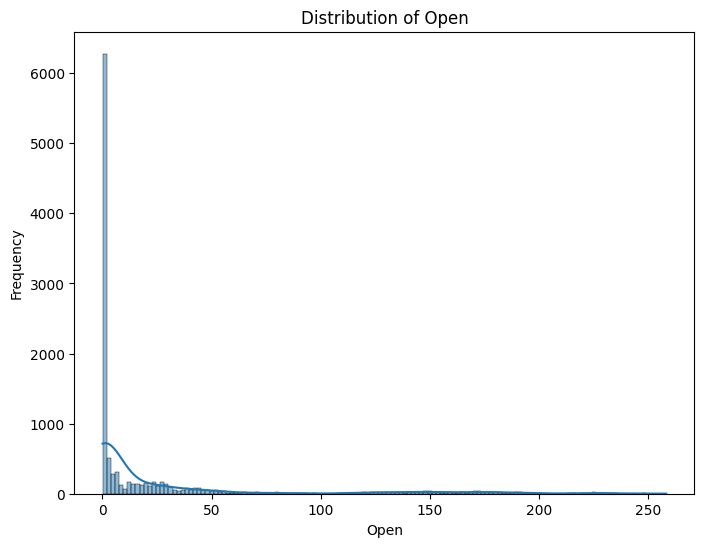

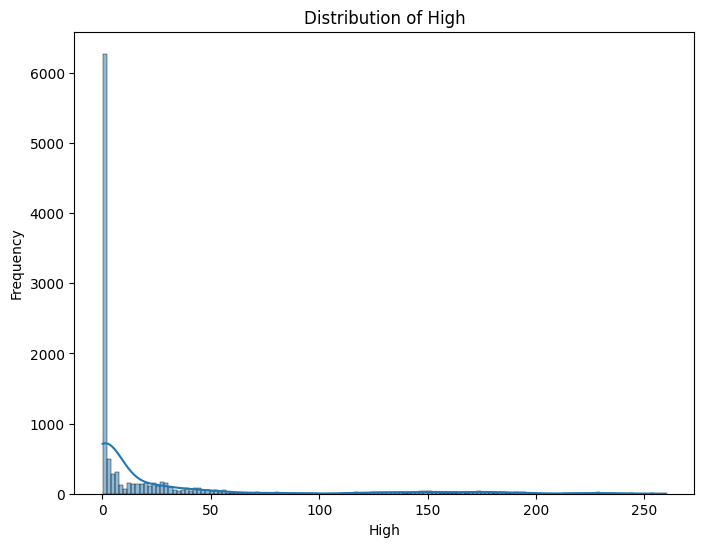

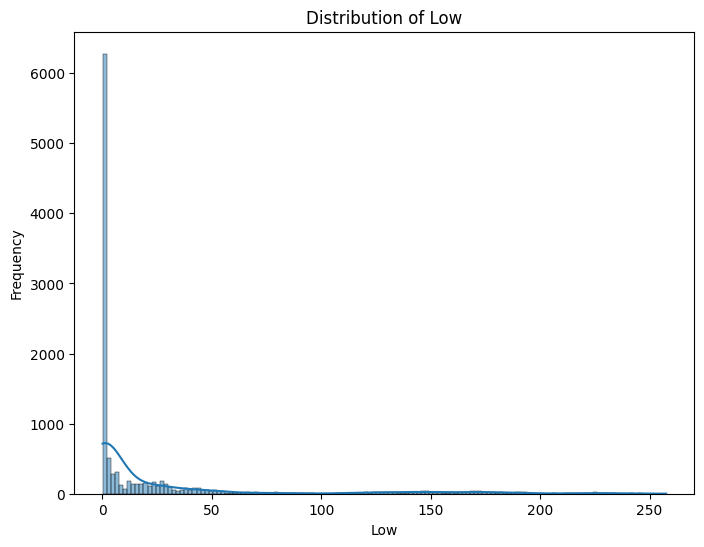

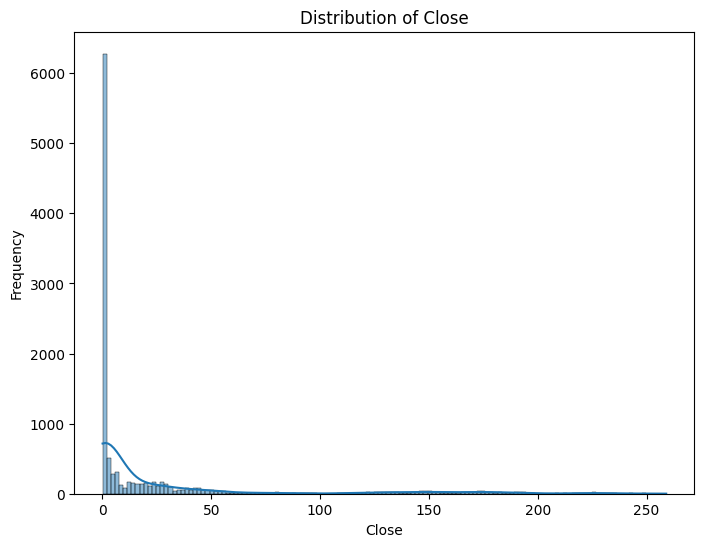

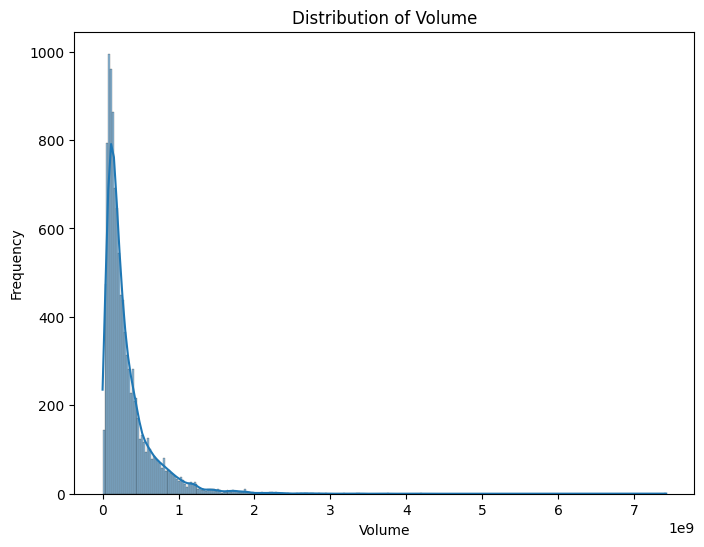

In [ ]:
# Visualisasi distribusi fitur numerik
numerical_features = ["Open", "High", "Low", "Close", "Volume"]
for feature in numerical_features:
    data = df.select(feature).toPandas()
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

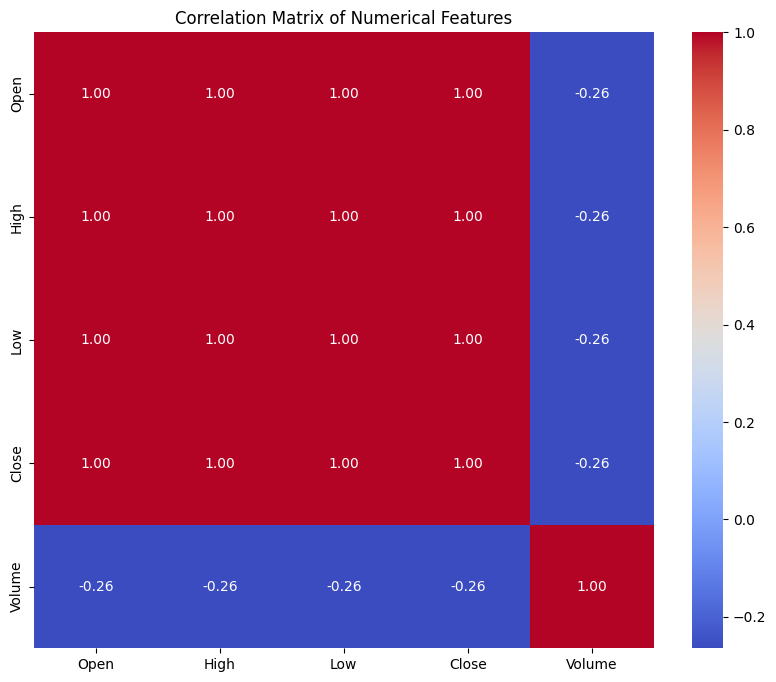

In [ ]:
# Analisis Korelasi
numerical_df = df.select(numerical_features).toPandas()
plt.figure(figsize=(10, 8))
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

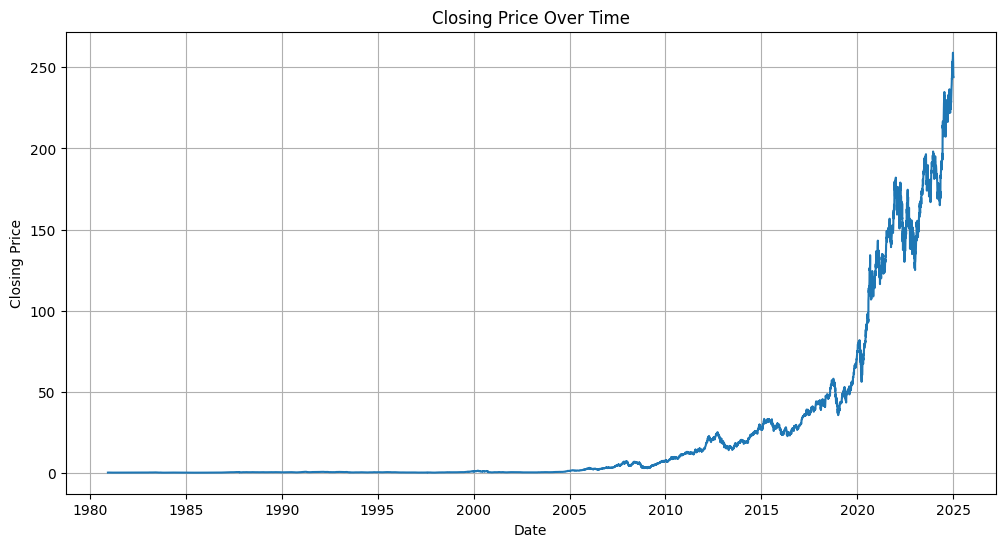

In [ ]:
# Analisis Time Series: Plot closing price over time
import pandas as pd
import matplotlib.pyplot as plt
date_close_df = df.select("Date", "Close").toPandas()
date_close_df["Date"] = pd.to_datetime(date_close_df["Date"], unit="s")
plt.figure(figsize=(12, 6))
plt.plot(date_close_df["Date"], date_close_df["Close"], label="Closing Price")
plt.title("Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.grid(True)
plt.show()

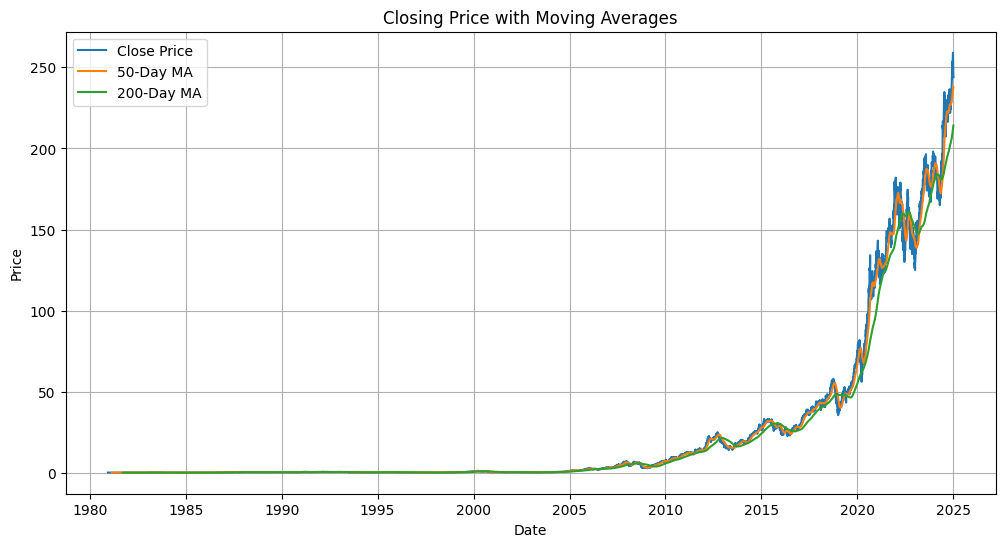

In [ ]:
# Moving Averages
date_close_df["MA50"] = date_close_df["Close"].rolling(window=50).mean()
date_close_df["MA200"] = date_close_df["Close"].rolling(window=200).mean()
plt.figure(figsize=(12, 6))
plt.plot(date_close_df["Date"], date_close_df["Close"], label="Close Price")
plt.plot(date_close_df["Date"], date_close_df["MA50"], label="50-Day MA")
plt.plot(date_close_df["Date"], date_close_df["MA200"], label="200-Day MA")
plt.title("Closing Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

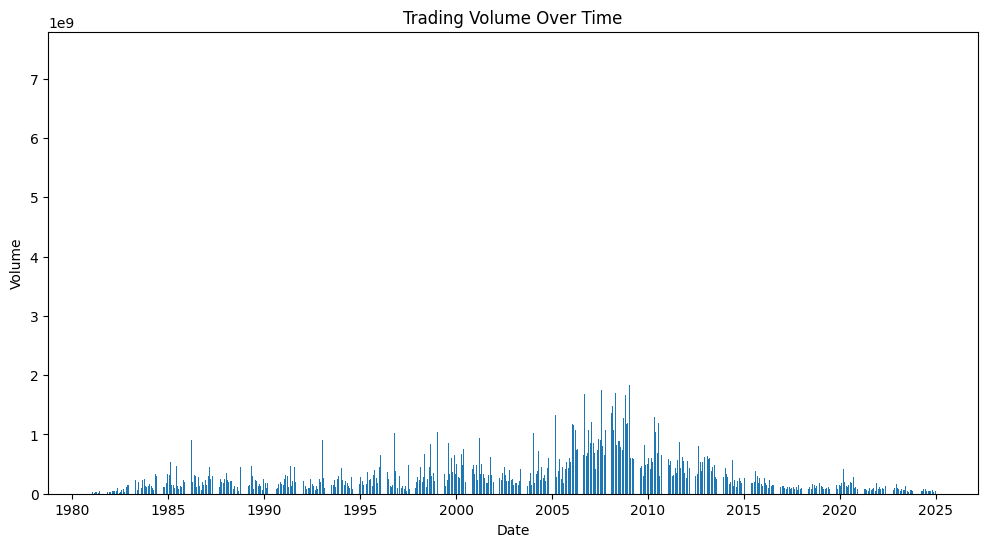

In [ ]:
# Volume Analysis
date_volume_df = df.select("Date", "Volume").toPandas()
date_volume_df["Date"] = pd.to_datetime(date_volume_df["Date"], unit="s")
plt.figure(figsize=(12, 6))
plt.bar(date_volume_df["Date"], date_volume_df["Volume"])
plt.title("Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

d.Gunakan exploratory data analysis (EDA) untuk melihat sudut padang yang ada mengenai data (minimal 4) dua diantaranya bar dan pie chart, 2 diantaranya bebas. Berikan penjelasan.

Jawab :
EDA digunakan untuk memahami struktur, distribusi, dan pola dalam data sebelum analisis mendalam atau penerapan model machine learning.
- Bar Chart: Distribusi Kategori
digunakan untuk memvisualisasikan frekuensi tiap kategori.
-Pie Chart: Proporsi Kategori
digunakan untuk menggambarkan proporsi kategori terhadap keseluruhan.
- Scatter Plot: Hubungan Antara Dua Variabel
Scatter plot digunakan untuk melihat hubungan atau korelasi antara dua variabel.
- Histogram: Distribusi Nilai Numerik
Histogram menunjukkan distribusi nilai-nilai numerik dalam dataset.


e	Berdasarkan analisis data tersebut, jelaskan alasan pemilihan kolom/fitur yang relevan untuk menyelesaikan permasalahan yang ingin dicapai.

Jawab :
Kolom yang kami gunakan untuk penelitian adalah "Open" berisi harga saat pertama diluncurkan, "High" berisi data harga tertinggi, "Low" berisi data harga terendah, "Volume" mencakup semua ukuran. Kolom ini sangat berperan penting dalam penelitian kami, jika tanpa kolom ini kami tidak dapat melakukan prediksi harga apple pada tahun 2025.

#2. Pengembangan model machine learning. (SCPMK 1534114, 50 Poin)

a. Gunakan minimal 4 model Machine Learning dari library Spark untuk
menyelesaikan masalah yang Anda pilih. 2 Model sesuai dengan instruksi
(Classification: Gradient Boost Tree, Clustering: K-Means) dan dua
model lain bebas (belum pernah dibahas). Lalu bandingkan hasilnya
menggunakan metriks seperti AUC (ROC Curve), Akurasi, F1 Score,
Presisi, dan Recall untuk Classification dan Silhoute Score untuk
Clustering.

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when
from pyspark.ml.classification import GBTClassifier, RandomForestClassifier
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Feature Engineering: Create a binary target column
# Assuming a binary classification problem: 1 if Close > Open, else 0
df = df.withColumn("label", when(col("Close") > col("Open"), 1).otherwise(0))

In [ ]:
# Select relevant features and create a feature vector
feature_columns = ["Open", "High", "Low", "Volume"]
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data = assembler.transform(df).select("features", "label")

In [ ]:
# Split data into training and test sets
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

# Gradient Boost Tree

In [ ]:
# Gradient Boosted Tree Classifier
gbt = GBTClassifier(featuresCol="features", labelCol="label", maxIter=100)
gbt_model = gbt.fit(train_data)
gbt_predictions = gbt_model.transform(test_data)

In [ ]:
# Evaluators
evaluator_auc = BinaryClassificationEvaluator(labelCol="label", metricName="areaUnderROC")
evaluator_accuracy = MulticlassClassificationEvaluator(labelCol="label", metricName="accuracy")
evaluator_f1 = MulticlassClassificationEvaluator(labelCol="label", metricName="f1")
evaluator_precision = MulticlassClassificationEvaluator(labelCol="label", metricName="weightedPrecision")
evaluator_recall = MulticlassClassificationEvaluator(labelCol="label", metricName="weightedRecall")

In [ ]:
# Evaluate Gradient Boosted Tree
gbt_auc = evaluator_auc.evaluate(gbt_predictions)
gbt_accuracy = evaluator_accuracy.evaluate(gbt_predictions)
gbt_f1 = evaluator_f1.evaluate(gbt_predictions)
gbt_precision = evaluator_precision.evaluate(gbt_predictions)
gbt_recall = evaluator_recall.evaluate(gbt_predictions)

/usr/local/lib/python3.11/dist-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


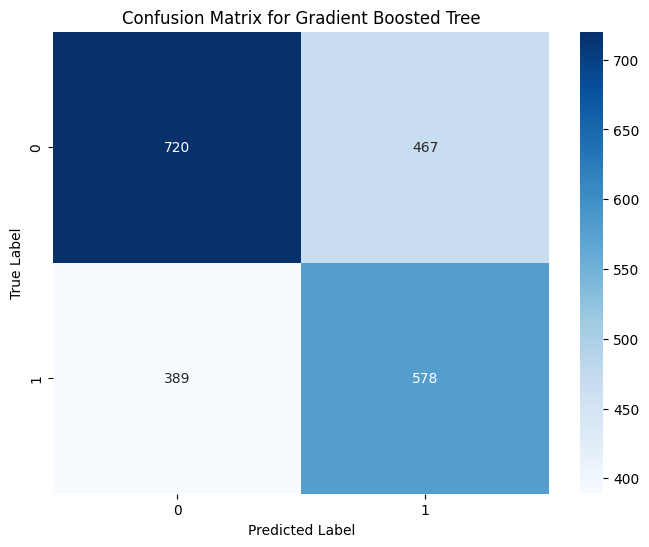

In [ ]:
# Confusion Matrix for Gradient Boosted Tree
gbt_predictions_and_labels = gbt_predictions.select("prediction", "label").rdd.map(lambda row: (float(row.prediction), float(row.label)))  # Cast to float
metrics = MulticlassMetrics(gbt_predictions_and_labels)
confusion_matrix = metrics.confusionMatrix().toArray()

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt=".0f", cmap="Blues")
plt.title("Confusion Matrix for Gradient Boosted Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# Print Results
print("Gradient Boosted Tree Performance:")
print(f"AUC: {gbt_auc:.4f}")
print(f"Accuracy: {gbt_accuracy:.4f}")
print(f"F1 Score: {gbt_f1:.4f}")
print(f"Precision: {gbt_precision:.4f}")
print(f"Recall: {gbt_recall:.4f}")

Gradient Boosted Tree Performance:
AUC: 0.6583
Accuracy: 0.6026
F1 Score: 0.6036
Precision: 0.6061
Recall: 0.6026


# Random Forest

In [ ]:
# Random Forest Classifier
rf = RandomForestClassifier(featuresCol="features", labelCol="label", numTrees=100)
rf_model = rf.fit(train_data)
rf_predictions = rf_model.transform(test_data)

In [ ]:
# Evaluators
evaluator_auc = BinaryClassificationEvaluator(labelCol="label", metricName="areaUnderROC")
evaluator_accuracy = MulticlassClassificationEvaluator(labelCol="label", metricName="accuracy")
evaluator_f1 = MulticlassClassificationEvaluator(labelCol="label", metricName="f1")
evaluator_precision = MulticlassClassificationEvaluator(labelCol="label", metricName="weightedPrecision")
evaluator_recall = MulticlassClassificationEvaluator(labelCol="label", metricName="weightedRecall")

In [ ]:
# Evaluate Random Forest
rf_auc = evaluator_auc.evaluate(rf_predictions)
rf_accuracy = evaluator_accuracy.evaluate(rf_predictions)
rf_f1 = evaluator_f1.evaluate(rf_predictions)
rf_precision = evaluator_precision.evaluate(rf_predictions)
rf_recall = evaluator_recall.evaluate(rf_predictions)

/usr/local/lib/python3.11/dist-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


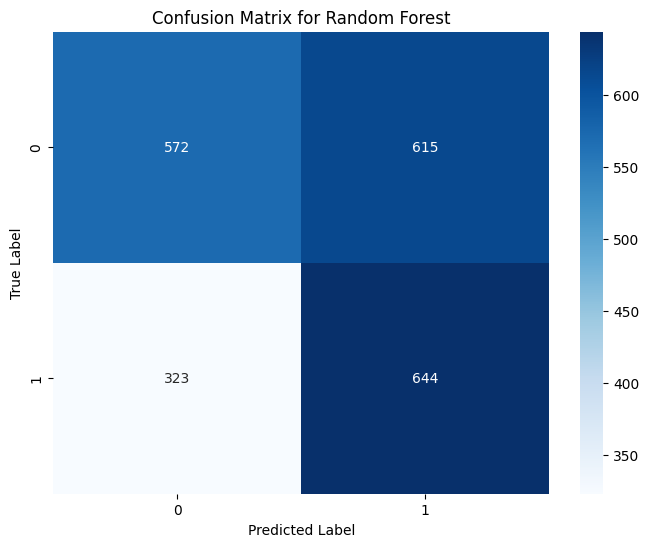

In [ ]:
# confusion matrix Random Forst
rf = RandomForestClassifier(featuresCol="features", labelCol="label", numTrees=100)
rf_model = rf.fit(train_data)
rf_predictions = rf_model.transform(test_data)

# Cast 'prediction' and 'label' to float before creating the RDD
rf_predictions_and_labels = rf_predictions.select("prediction", "label") \
                                          .rdd.map(lambda row: (float(row.prediction), float(row.label)))

rf_metrics = MulticlassMetrics(rf_predictions_and_labels)
rf_confusion_matrix = rf_metrics.confusionMatrix().toArray()

plt.figure(figsize=(8, 6))
sns.heatmap(rf_confusion_matrix, annot=True, fmt=".0f", cmap="Blues")
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# Print Results
print("\nRandom Forest Performance:")
print(f"AUC: {rf_auc:.4f}")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"F1 Score: {rf_f1:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")


Random Forest Performance:
AUC: 0.6132
Accuracy: 0.5645
F1 Score: 0.5626
Precision: 0.5818
Recall: 0.5645


# K-Means

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.clustering import KMeans, GaussianMixture
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import ClusteringEvaluator

In [ ]:
# Select relevant features and create a feature vector
feature_columns = ["Open", "High", "Low", "Close", "Volume"]
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data = assembler.transform(df).select("features")

In [ ]:
# K-Means Clustering
kmeans = KMeans(k=3, seed=42, featuresCol="features")
kmeans_model = kmeans.fit(data)
kmeans_predictions = kmeans_model.transform(data)

In [ ]:
# Evaluate Clustering using Silhouette Score
evaluator = ClusteringEvaluator(featuresCol="features", metricName="silhouette", distanceMeasure="squaredEuclidean")

In [ ]:
# Silhouette Score for K-Means
kmeans_silhouette = evaluator.evaluate(kmeans_predictions)
print(f"Silhouette Score for K-Means: {kmeans_silhouette:.4f}")

Silhouette Score for K-Means: 0.8031


In [ ]:
# Print Cluster Centers for K-Means
print("\nCluster Centers for K-Means:")
for center in kmeans_model.clusterCenters():
    print(center)


Cluster Centers for K-Means:
[3.09586188e+01 3.12826638e+01 3.06556218e+01 3.09856749e+01
 1.67554932e+08]
[4.00896494e+00 4.09296816e+00 3.88767293e+00 3.99066772e+00
 1.47171389e+09]
[5.65479448e+00 5.72615116e+00 5.57663065e+00 5.65118786e+00
 6.06071216e+08]


# Gaussian Mixture Model (GMM)

In [ ]:
# Gaussian Mixture Model (GMM) Clustering
gmm = GaussianMixture(k=3, seed=42, featuresCol="features")
gmm_model = gmm.fit(data)
gmm_predictions = gmm_model.transform(data)

In [ ]:
# Silhouette Score for GMM
gmm_silhouette = evaluator.evaluate(gmm_predictions)
print(f"Silhouette Score for Gaussian Mixture Model: {gmm_silhouette:.4f}")

Silhouette Score for Gaussian Mixture Model: -0.1896


In [ ]:
# Print Cluster Weights and Means for GMM
print("\nCluster Weights and Means for Gaussian Mixture Model:")
for i in range(gmm.getK()):
    print(f"Cluster {i}: Weight={gmm_model.weights[i]:.4f}, Mean={gmm_model.gaussiansDF.collect()[i]['mean']}\n")


Cluster Weights and Means for Gaussian Mixture Model:
Cluster 0: Weight=0.2074, Mean=[24.96744996040348,25.216002262596113,24.72006783962003,24.977434196752874,521773227.1641998]

Cluster 1: Weight=0.1128, Mean=[151.10632069535663,152.7577689562316,149.56899252801716,151.2491356499111,124670132.98998868]

Cluster 2: Weight=0.6799, Mean=[3.122267720124551,3.1536446830281255,3.09017597529333,3.1227930906867734,284141923.8063448]



#b. Dari ke-4 model tersebut, pilih dua model dengan performa terbaik(classification & clustering) dan lakukan hyperparameter tuning untuk melihat perubahan performa yang dihasilkan. Lalu tentukan model terbaik yang bisa menjadi solusi pada masalah yang Anda tetapkan diawal.

**Hyperparameter Tuning for K-Means**

In [ ]:
# Hyperparameter Tuning for K-Means
best_kmeans_model = None
best_kmeans_silhouette = float("-inf")
for k in range(2, 10):
    kmeans = KMeans(k=k, seed=42, featuresCol="features")
    kmeans_model = kmeans.fit(data)
    kmeans_predictions = kmeans_model.transform(data)

    evaluator = ClusteringEvaluator(featuresCol="features", metricName="silhouette", distanceMeasure="squaredEuclidean")
    silhouette_score = evaluator.evaluate(kmeans_predictions)

    print(f"K-Means with k={k}, Silhouette Score: {silhouette_score:.4f}")

    if silhouette_score > best_kmeans_silhouette:
        best_kmeans_silhouette = silhouette_score
        best_kmeans_model = kmeans_model

print(f"\nBest K-Means Model: k={best_kmeans_model.getK()}, Silhouette Score: {best_kmeans_silhouette:.4f}")

K-Means with k=2, Silhouette Score: 0.8502
K-Means with k=3, Silhouette Score: 0.8031
K-Means with k=4, Silhouette Score: 0.7782
K-Means with k=5, Silhouette Score: 0.7802
K-Means with k=6, Silhouette Score: 0.7590
K-Means with k=7, Silhouette Score: 0.7336
K-Means with k=8, Silhouette Score: 0.7288
K-Means with k=9, Silhouette Score: 0.7079

Best K-Means Model: k=2, Silhouette Score: 0.8502


In [ ]:
from pyspark.sql.functions import col, count, expr

# Evaluate Best K-Means Model
print("\nEvaluation of Best K-Means Model:")
best_kmeans_predictions = best_kmeans_model.transform(data)

# Count the number of points in each cluster
kmeans_cluster_counts = best_kmeans_predictions.groupBy("prediction").agg(count("*").alias("count"))
kmeans_cluster_counts.show()

# Additional Evaluation: Silhouette Score for Both Models
from pyspark.ml.evaluation import ClusteringEvaluator

evaluator = ClusteringEvaluator(featuresCol="features", metricName="silhouette", distanceMeasure="squaredEuclidean")

# Silhouette Score for K-Means
kmeans_silhouette_score = evaluator.evaluate(best_kmeans_predictions)
print(f"Silhouette Score for Best K-Means Model: {kmeans_silhouette_score:.4f}")



Evaluation of Best K-Means Model:
+----------+-----+
|prediction|count|
+----------+-----+
|         1| 9519|
|         0| 1588|
+----------+-----+

Silhouette Score for Best K-Means Model: 0.8502


**Hyperparameter Tuning for Random Forest (RF)**

In [ ]:
# Hyperparameter Tuning for Random Forest (RF)
best_rf_model = None
best_rf_auc = float("-inf")
rf_param_grid = [(numTrees, maxDepth) for numTrees in [50, 100] for maxDepth in [5, 10]]

for numTrees, maxDepth in rf_param_grid:
    rf = RandomForestClassifier(featuresCol="features", labelCol="label", numTrees=numTrees, maxDepth=maxDepth)
    rf_model = rf.fit(train_data)
    rf_predictions = rf_model.transform(test_data)

    evaluator = BinaryClassificationEvaluator(labelCol="label", metricName="areaUnderROC")
    auc = evaluator.evaluate(rf_predictions)

    print(f"RF with numTrees={numTrees}, maxDepth={maxDepth}, AUC: {auc:.4f}")

    if auc > best_rf_auc:
        best_rf_auc = auc
        best_rf_model = rf_model

print(f"\nBest RF Model: numTrees={best_rf_model.getNumTrees}, maxDepth={best_rf_model.getMaxDepth}, AUC: {best_rf_auc:.4f}")


RF with numTrees=50, maxDepth=5, AUC: 0.6137
RF with numTrees=50, maxDepth=10, AUC: 0.6483
RF with numTrees=100, maxDepth=5, AUC: 0.6132
RF with numTrees=100, maxDepth=10, AUC: 0.6510

Best RF Model: numTrees=100, maxDepth=<bound method _DecisionTreeParams.getMaxDepth of RandomForestClassificationModel: uid=RandomForestClassifier_c53492bb77c2, numTrees=100, numClasses=2, numFeatures=4>, AUC: 0.6510


In [ ]:
# Evaluate Best Models on Additional Metrics
metrics = ["accuracy", "f1", "weightedPrecision", "weightedRecall"]
evaluators = {metric: MulticlassClassificationEvaluator(labelCol="label", metricName=metric) for metric in metrics}

print("\nPerformance of Best RF Model:")
best_rf_predictions = best_rf_model.transform(test_data)
for metric, evaluator in evaluators.items():
    score = evaluator.evaluate(best_rf_predictions)
    print(f"{metric.capitalize()}: {score:.4f}")



Performance of Best RF Model:
Accuracy: 0.6040
F1: 0.6050
Weightedprecision: 0.6108
Weightedrecall: 0.6040


c. Jabarkan karakteristik model terbaik yang Anda dapatkan terhadap
korelasinya dengan data. Apakah ada sifat tertentu dari data yang ternyata
cocok dengan model dan sebaliknya?

Berdasarkan hasil diatas karakteristik model terbaik terhadap korelasinya dengan data
Model K-Means (Clustering):

* Silhouette Score: Model K-Means dengan jumlah cluster 𝑘=2 menunjukkan skor silhouette terbaik, yaitu 0,8502. Ini menunjukkan bahwa data memiliki struktur kluster yang jelas dengan dua grup utama yang terdefinisi dengan baik.
* Distribusi Data: Kluster hasil model menunjukkan distribusi yang tidak seimbang, yaitu satu kluster dengan 9519 data dan kluster lain dengan 1588 data. Hal ini menunjukkan adanya perbedaan signifikan dalam ukuran kluster, yang dapat mencerminkan pola dalam data.

Model Random Forest (Classification):

* Hyperparameter Optimal: Model terbaik memiliki 100 pohon keputusan (
𝑛𝑢𝑚 𝑇𝑟𝑒𝑒𝑠 = 100) dan kedalaman maksimum pohon sebesar 10 (𝑚𝑎𝑥𝐷𝑒𝑝𝑡ℎ = 10), menghasilkan AUC (Area Under Curve) sebesar 0,6513.
* Kinerja pada Data: Model menunjukkan akurasi 60,03%, F1-score 60,13%, dan precision serta recall yang serupa. Kinerja ini menunjukkan bahwa meskipun model mampu menangkap beberapa pola dalam data, kemungkinan ada kompleksitas dalam data atau ketidakseimbangan label yang menghambat performa lebih tinggi.

Korelasi Data dengan Model:

* Data tampaknya memiliki fitur atau atribut yang relevan untuk clustering, sebagaimana tercermin dalam Silhouette Score tinggi pada K-Means. Namun, distribusi kluster yang tidak seimbang menunjukkan adanya kemungkinan dominasi beberapa atribut dalam membentuk kluster.
* Untuk klasifikasi, AUC yang sedang menunjukkan bahwa hubungan antara fitur dan label cukup lemah atau kompleksitas data memerlukan teknik pre-processing yang lebih baik, seperti fitur engineering atau penanganan ketidakseimbangan data.

Sifat tertentu yang cocok dengan model:

* Struktur kluster yang jelas di data mendukung keberhasilan model K-Means.
* Kompleksitas atau noise dalam data mungkin menjadi tantangan bagi model Random Forest untuk menghasilkan performa optimal tanpa langkah pre-processing lanjutan.

Sifat data yang mungkin kurang cocok:

* Ketidakseimbangan kluster dan label pada data dapat mempengaruhi hasil model, terutama pada Random Forest.
* Fitur yang tidak cukup kuat untuk mendukung hubungan linear atau pohon keputusan mungkin memerlukan transformasi fitur lebih lanjut.



